In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.

In [2]:
user_df = pd.read_csv('cleaned_user_list.csv')


In [3]:
anime_df = pd.read_csv('cleaned_anime_list.csv')


In [4]:
user_anime_df = pd.read_csv('cleaned_user_anime_list.csv')

In [5]:
user_df.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
0,karthiga,2255153,3,49,1,0,0,55.31,2013-03-03,2014-02-04 01:32:00,7.43,0.0,3391.0
1,RedvelvetDaisuki,1897606,61,396,39,0,206,118.07,2012-12-13,1900-05-13 02:47:00,6.78,80.0,7094.0
2,Damonashu,37326,45,195,27,25,59,83.70,2008-02-13,1900-03-24 12:48:00,6.15,6.0,4936.0
3,bskai,228342,25,414,2,5,11,167.16,2009-08-31,2014-05-12 16:35:00,8.27,1.0,10081.0
4,shuzzable,2347781,36,72,16,2,25,35.48,2013-03-25,2015-09-09 21:54:00,9.06,7.0,2154.0


In [6]:
anime_df.head()

,anime_id,title,type,source,episodes,status,airing,aired_string,aired,duration,...,scored_by,rank,popularity,members,favorites,related,studio,genre,opening_theme,ending_theme
0,11013,Inu x Boku SS,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,...,139250,1274.0,231,283882,2809,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...",David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ..."
1,2104,Seto no Hanayome,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,...,91206,727.0,366,204003,2579,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...",Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi..."
2,5262,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,...,37129,1508.0,1173,70127,802,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...",Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ..."
3,721,Princess Tutu,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,...,36501,307.0,916,93312,3344,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...",Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ..."
4,12365,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,...,107767,50.0,426,182765,2082,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...",J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)..."


In [7]:
user_anime_df.head()

,username,anime_id,my_watched_episodes,my_start_date,my_finish_date,my_score,my_status,my_rewatching_ep,my_last_updated
0,karthiga,21,586,0000-00-00,0000-00-00,9,1,0,1362307973
1,karthiga,59,26,0000-00-00,0000-00-00,7,2,0,1362923691
2,karthiga,74,26,0000-00-00,0000-00-00,7,2,0,1367081015
3,karthiga,120,26,0000-00-00,0000-00-00,7,2,0,1362308037
4,karthiga,178,26,0000-00-00,0000-00-00,7,2,0,1364399953


In [8]:
print(user_df.describe())


            user_id  user_watching  user_completed    user_onhold  \
count  3.026740e+05  302674.000000   302674.000000  302674.000000   
mean   2.061407e+06      13.400011      166.638317       9.861802   
std    2.118038e+06      34.747103      239.360326      34.270450   
min    1.000000e+00       0.000000        0.000000       0.000000   
25%    2.322448e+05       2.000000       28.000000       0.000000   
50%    1.167586e+06       6.000000       96.000000       2.000000   
75%    3.883448e+06      14.000000      217.000000      10.000000   
max    7.273306e+06    6370.000000    11536.000000    9729.000000   

        user_dropped  user_plantowatch  user_days_spent_watching  \
count  302674.000000     302674.000000              3.026740e+05   
mean       10.550331         64.040436              6.907652e+01   
std        43.119921        157.486151              4.741028e+03   
min         0.000000          0.000000              0.000000e+00   
25%         0.000000          2.000000

In [9]:
print(anime_df.describe())

           anime_id      episodes         score     scored_by          rank  \
count  14478.000000  14478.000000  14478.000000  1.447800e+04  14478.000000   
mean   17377.229866     11.308399      6.142482  1.146003e+04   7143.651057   
std    13165.315011     43.443451      1.463981  4.310519e+04   4050.377058   
min        1.000000      0.000000      0.000000  0.000000e+00      0.000000   
25%     4389.250000      1.000000      5.550000  4.600000e+01   3611.250000   
50%    15135.000000      1.000000      6.370000  5.010000e+02   7230.000000   
75%    31146.500000     12.000000      7.060000  3.941500e+03  10838.750000   
max    37916.000000   1818.000000     10.000000  1.009477e+06  12920.000000   

         popularity       members      favorites  
count  14478.000000  1.447800e+04   14478.000000  
mean    7220.259566  2.296640e+04     311.649606  
std     4170.080564  7.498136e+04    2615.554211  
min        0.000000  0.000000e+00       0.000000  
25%     3611.500000  2.450000e+02

In [10]:
print(user_anime_df.describe())

           anime_id  my_watched_episodes      my_score     my_status  \
count  8.007585e+07         8.007585e+07  8.007585e+07  8.007585e+07   
mean   1.196188e+04         1.396330e+01  4.338409e+00  3.035068e+00   
std    1.143202e+04         3.391275e+02  3.933399e+00  1.746709e+00   
min    1.000000e+00         0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.762000e+03         0.000000e+00  0.000000e+00  2.000000e+00   
50%    8.476000e+03         3.000000e+00  6.000000e+00  2.000000e+00   
75%    2.047900e+04         1.300000e+01  8.000000e+00  4.000000e+00   
max    3.791600e+04         6.553500e+04  1.000000e+01  5.500000e+01   

       my_rewatching_ep  my_last_updated  
count      8.007585e+07     8.007585e+07  
mean       7.406546e+00     1.383827e+09  
std        1.110975e+04     1.401152e+08  
min        0.000000e+00     0.000000e+00  
25%        0.000000e+00     1.323886e+09  
50%        0.000000e+00     1.404043e+09  
75%        0.000000e+00     1.467512e+09  
max    

# EDA

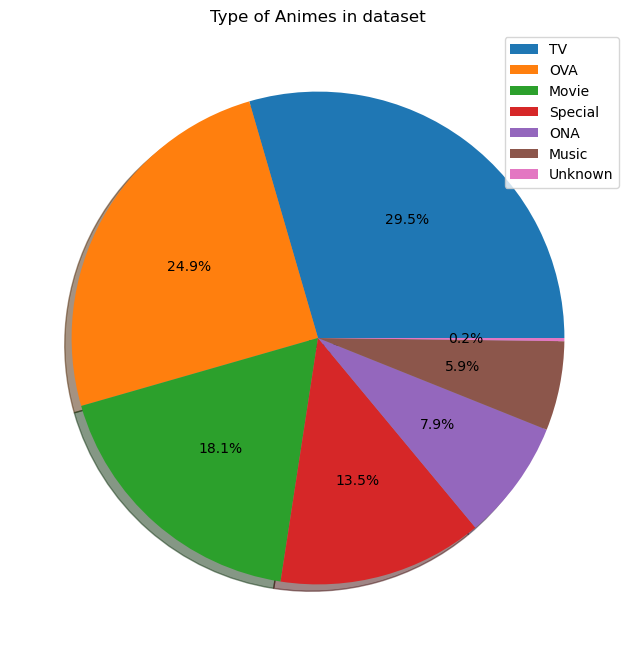

In [11]:
anime_df['type'].value_counts().plot.pie(autopct='%.1f%%',labels=None,shadow=True,figsize=(8,8))
plt.title('Type of Animes in dataset')
plt.ylabel('')
plt.legend(anime_df['type'].value_counts().index.tolist(),loc='upper right')
plt.show()

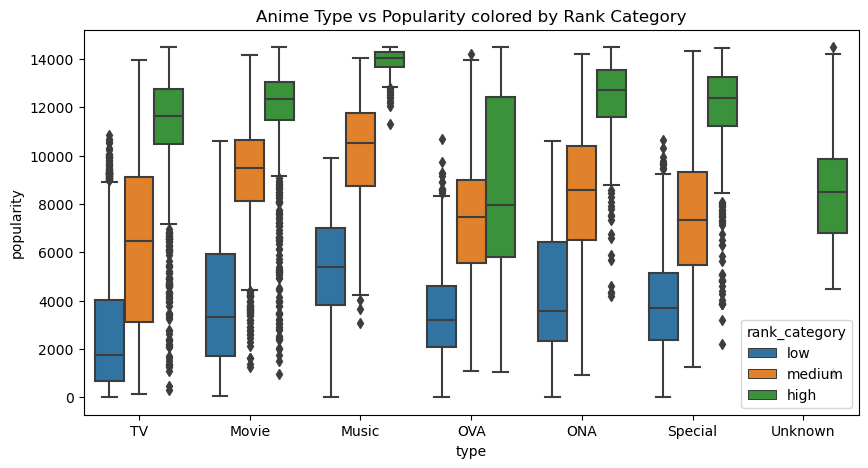

In [12]:
#checking to see how rank affects type and popularity.
anime_df['rank_category'] = pd.qcut(anime_df['rank'], q=3, labels=["low", "medium", "high"])

plt.figure(figsize=(10,5))
sns.boxplot(x='type', y='popularity', hue='rank_category', data=anime_df)
plt.title('Anime Type vs Popularity colored by Rank Category')
plt.show()

anime_df = anime_df.drop(columns='rank_category')
#I do not need this anymore so I will drop this

In [13]:
#I noticed the user Anime list is pretty large, and so I will only use the columns that are representing this problem statement
ratings_df = user_anime_df[['username','anime_id', 'my_score','my_status']]

In [14]:
ratings_df.head()

,username,anime_id,my_score,my_status
0,karthiga,21,9,1
1,karthiga,59,7,2
2,karthiga,74,7,2
3,karthiga,120,7,2
4,karthiga,178,7,2


In [15]:
ratings_df['my_score'].describe().apply(lambda x: format(x, '.2f')).reset_index()

,index,my_score
0,count,80075851.00
1,mean,4.34
2,std,3.93
3,min,0.00
4,25%,0.00
5,50%,6.00
6,75%,8.00
7,max,10.00


In [16]:
#Now I will take the upper and lower bounds of the score so I can use this later.
lower_rating = ratings_df['my_score'].min()
upper_rating = ratings_df['my_score'].max()
print(f'The ratings are between: {lower_rating} to {upper_rating}')


The ratings are between: 0 to 10


In [17]:
user_ratings = ratings_df.groupby('username').size().reset_index(name='animes_rated')


In [18]:
sample_df_users = user_df.sample(frac = .20, random_state = 2)
sample_df_users.head()

,username,user_id,user_watching,user_completed,user_onhold,user_dropped,user_plantowatch,user_days_spent_watching,join_date,last_online,stats_mean_score,stats_rewatched,stats_episodes
188054,Linder1338,6381411,10,163,7,7,131,49.87,2017-07-08,2018-05-17 01:50:19,6.53,17.0,2970.0
280271,SakuraMikan12,227615,5,22,0,0,9,24.99,2009-08-29,2014-05-04 08:20:00,9.90,1.0,1504.0
91351,R_I_N,118447,15,351,17,2,13,93.26,2008-11-28,1900-05-10 11:53:00,8.08,20.0,5547.0
195893,DrFaust,124603,3,117,3,1,2,40.58,2008-12-17,2008-12-18 13:59:00,7.92,50.0,2436.0
174944,Wispp,1346555,9,9,0,1,18,3.27,2012-06-14,2012-10-13 16:36:00,8.20,50.0,199.0


In [19]:
user_ratings_sampled = pd.merge(
    user_ratings, sample_df_users, left_on = 'username', right_on = 'username', how = 'inner')

In [20]:
user_ratings_aggregated = user_ratings_sampled.groupby('animes_rated').size().reset_index(
    name='group_size').sort_values(by='animes_rated')


In [21]:
ratings_anime = ratings_df.groupby('anime_id').size().reset_index(name='number_of_users')
ratings_anime.head()


,anime_id,number_of_users
0,1,118609
1,5,45154
2,6,79613
3,7,27261
4,8,3913


In [22]:
anime_ratings_aggregated = ratings_anime.groupby('number_of_users').size().reset_index(
    name='size_of_users').sort_values(by='number_of_users')
anime_ratings_aggregated.head(100)

,number_of_users,size_of_users
0,1,5
1,2,3
2,3,4
3,4,5
4,5,2
...,...,...
95,96,36
96,97,21
97,98,21
98,99,18


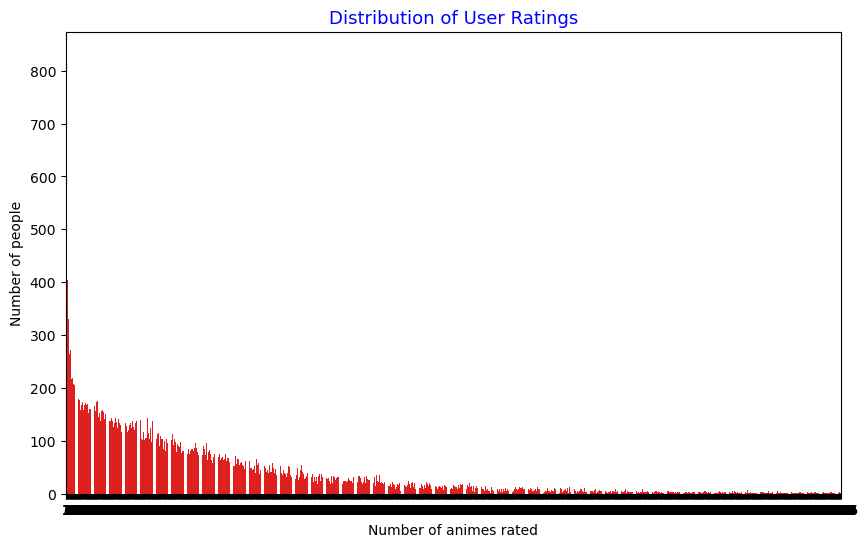

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='animes_rated', y='group_size', data=user_ratings_aggregated, color='red')
plt.xlabel('Number of animes rated')
plt.ylabel('Number of people')
plt.title("Distribution of User Ratings", fontsize=13, fontweight=0, color='Blue')
plt.xlim(left=0, right=1500)
plt.show()


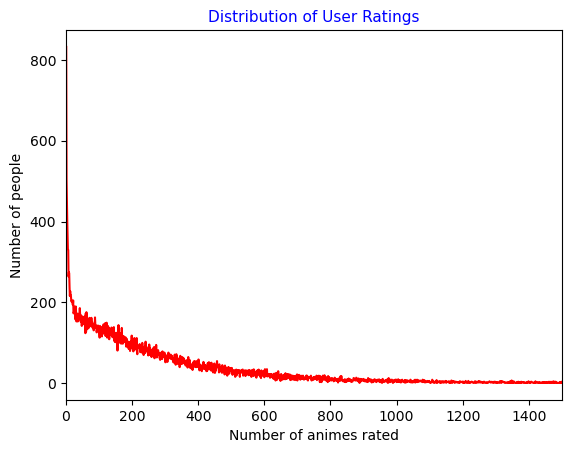

In [24]:
plt.plot('animes_rated', 'group_size', data = user_ratings_aggregated, color = 'red')
plt.title("Distribution of User Ratings", fontsize=11, fontweight=0, color='Blue')
plt.xlabel('Number of animes rated')
plt.ylabel('Number of people')
plt.xlim(left = 0, right = 1500)
plt.show()

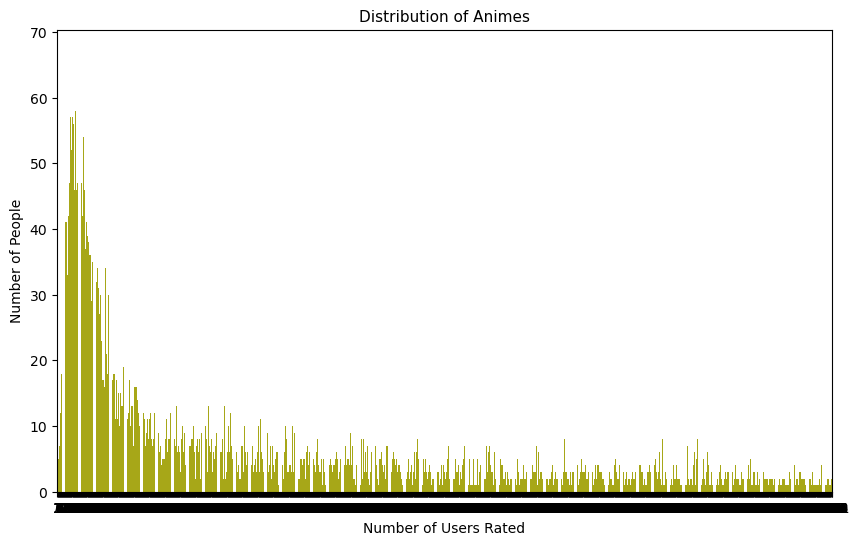

In [25]:
plt.figure(figsize=(10, 6))
sns.barplot(x='number_of_users', y='size_of_users', data=anime_ratings_aggregated, color='y')
plt.xlabel('Number of Users Rated')
plt.ylabel('Number of People')
plt.title("Distribution of Animes", fontsize=11, fontweight=0, color='black')
plt.xlim(left=0, right=1500)
plt.show()

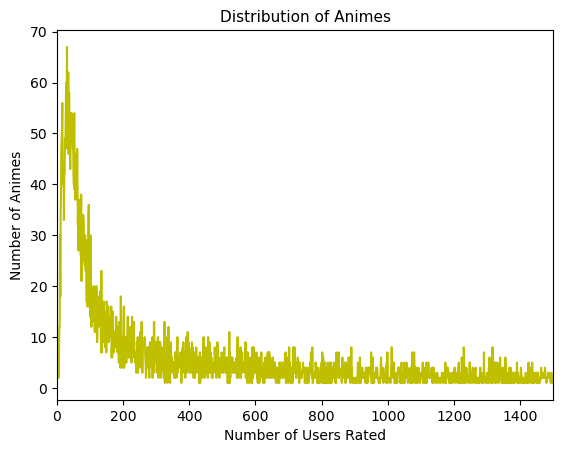

In [26]:
plt.title("Distribution of Animes", fontsize=11, fontweight=0, color='Black')
plt.plot('number_of_users', 'size_of_users', data = anime_ratings_aggregated, color = 'y')
plt.xlabel('Number of Users Rated')
plt.ylabel('Number of Animes')
plt.xlim(left = 0, right = 1500)
plt.show()

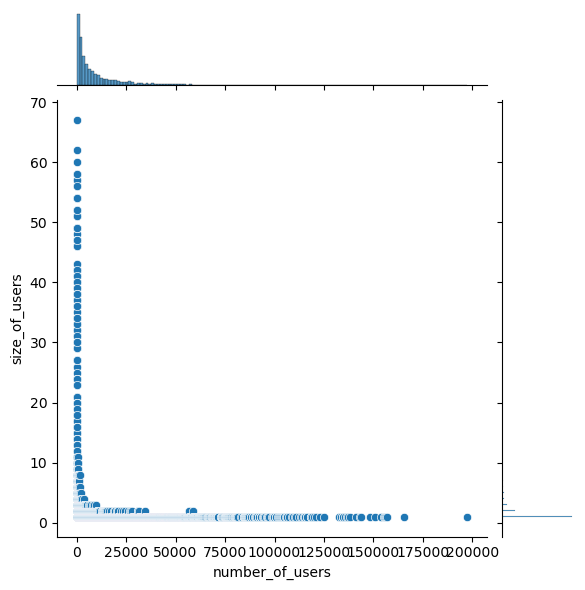

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.jointplot(x='number_of_users', y='size_of_users', data=anime_ratings_aggregated);

In [31]:
# I wanna look at the top 10 animes and rank them by popularity
merged_anime_df = pd.merge(anime_df[['anime_id', 'title', 'rank', 'popularity']], 
                     user_anime_df[['anime_id', 'my_score']], on='anime_id', how='inner')


In [32]:
merged_anime_df.sort_values(by='title', inplace=True)

In [33]:
average_scores_df = merged_anime_df.groupby('title')['my_score'].mean().reset_index()

In [34]:
average_scores_df.sort_values(by="my_score", ascending=False,inplace = True)

In [37]:
top_10_anime = average_scores_df.head(10)

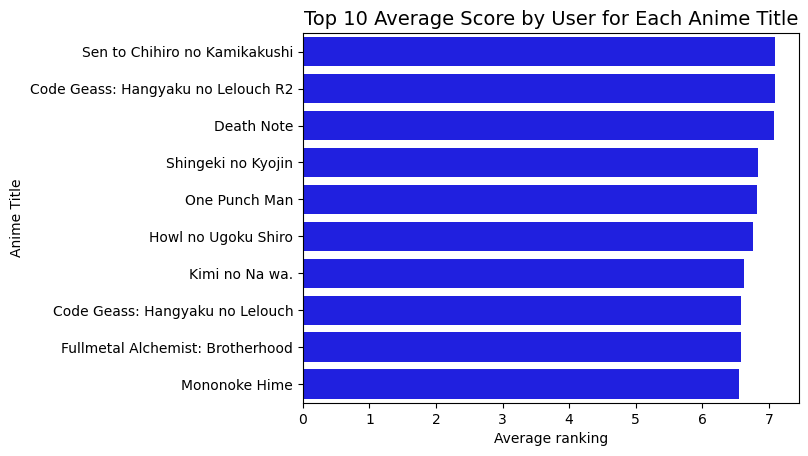

In [39]:
sns.barplot(x='my_score', y='title', data=top_10_anime, color='blue')

plt.xlabel('Average ranking')
plt.ylabel('Anime Title')

plt.title('Top 10 Average Score by User for Each Anime Title', fontsize=14)

plt.show()